In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd. read_csv('Global YouTube Statistics.csv', encoding='cp1251')

df.head(5)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [4]:
#  розміри датасету 
df.shape

(995, 28)

In [5]:
# кількість пропусків 
print(df.isna().sum())

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [6]:
#дублікати
df.duplicated().sum()
print(df.duplicated().sum())

0


In [7]:
df.replace(' ', pd.NA, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
print(df.isna().sum())
df.fillna(df.mean(), inplace=True)
df = df.astype(float)

rank                                         0
Youtuber                                   995
subscribers                                  0
video views                                  0
category                                   995
Title                                      995
uploads                                      0
Country                                    995
Abbreviation                               995
channel_type                               995
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                              995
created_date 

In [8]:
df.isna().sum()

rank                                         0
Youtuber                                   995
subscribers                                  0
video views                                  0
category                                   995
Title                                      995
uploads                                      0
Country                                    995
Abbreviation                               995
channel_type                               995
video_views_rank                             0
country_rank                                 0
channel_type_rank                            0
video_views_for_the_last_30_days             0
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days                 0
created_year                                 0
created_month                              995
created_date 

In [9]:
#скільки унікальних країн представлено у колонці "Country" 
countries = df['Country'].nunique()
print(countries)

0


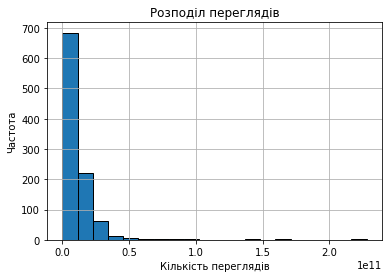

In [10]:
#  Побудуйте діаграму розподілу переглядів (використовуйте kind='hist'):
df['video views'].plot(kind='hist', bins=20, edgecolor='black')
plt.xlabel('Кількість переглядів')
plt.ylabel('Частота')
plt.title('Розподіл переглядів')
plt.grid(True)
plt.show()

In [11]:
#Визначити максимальну, мінімальну, середню кількість переглядів (використовуйте методи max, min, mean) 
print(df['video views'].max())
print(df['video views'].min())
print(df['video views'].mean())

228000000000.0
0.0
11039537052.03819


In [2]:
# Знайnb країну, де найбільше відео було завантажено на YouTube 
country = df.at[df['uploads'].idxmax(), 'Country']
print(country)

India


In [3]:
# відео  з найбільшою та найменшою кількістю завантажень
video1 = df.at[df['uploads'].idxmax(), 'Title']
video2 = df.at[df['uploads'].idxmin(), 'Title']
print("Найбільша к-сть завантажень:", video1 )
print("Найменша к-сть завантажень:", video2 )

Найбільша к-сть завантажень: ABP NEWS
Найменша к-сть завантажень: Music
